In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path
savefig_path = '/home/as259691/Documents/rapports/CSI2/nb12/'

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib inline
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

# Test de l'opérateur ProblemDiscontinu2

In [3]:
n_lim = 10**8
t_fin_lim = 1.

In [4]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5, fo=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
6.918433404737903e-06
Cas : diffusion
dE*/dt* ref = -1.14723e-08
dt fourier
6.918433404737903e-06
Cas : mixte
dE*/dt* = -7.49224e-06
dt fourier
6.918433404737903e-06
EC, Cas : mixte
dE*/dt* = 3.48334e-06
dt fourier
6.918433404737903e-06
Ti
EFC, Cas : mixte
dE*/dt* = -1.08188e-19
dt fourier
6.918433404737903e-06
Ti
TFC, Cas : mixte
dE*/dt* = -6.65257e-06
dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte
dE*/dt* = -2.16391e-07


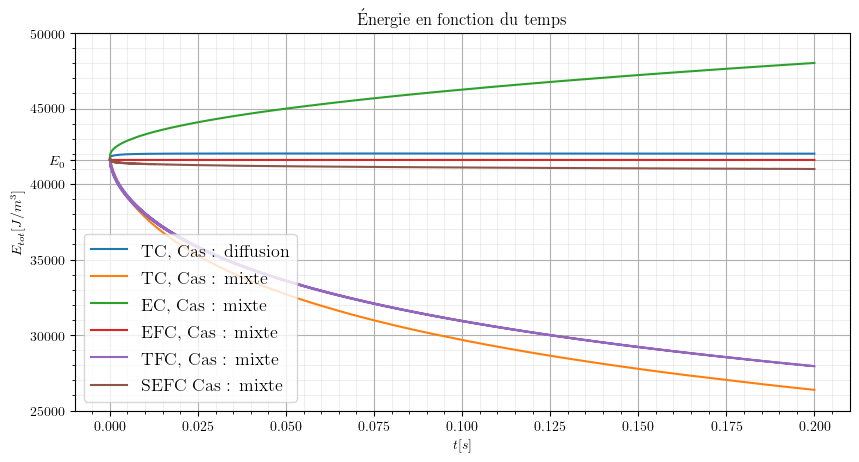

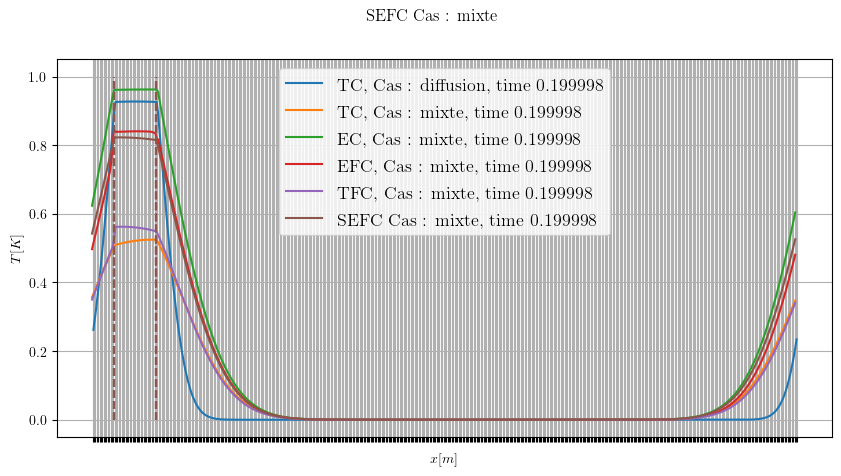

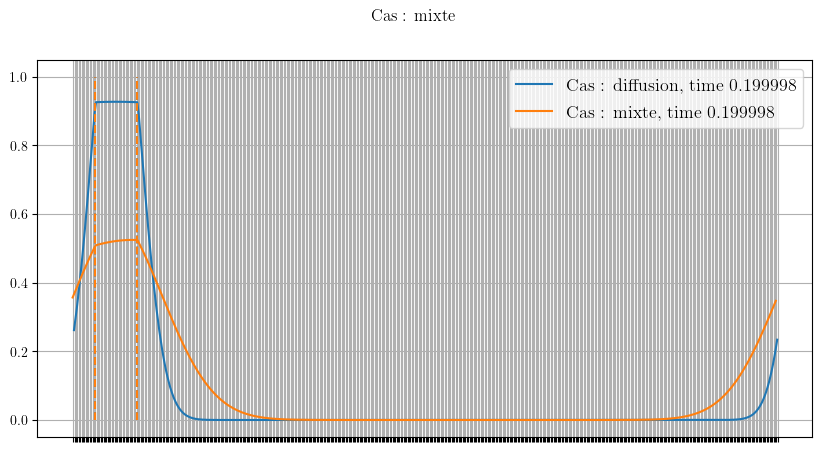

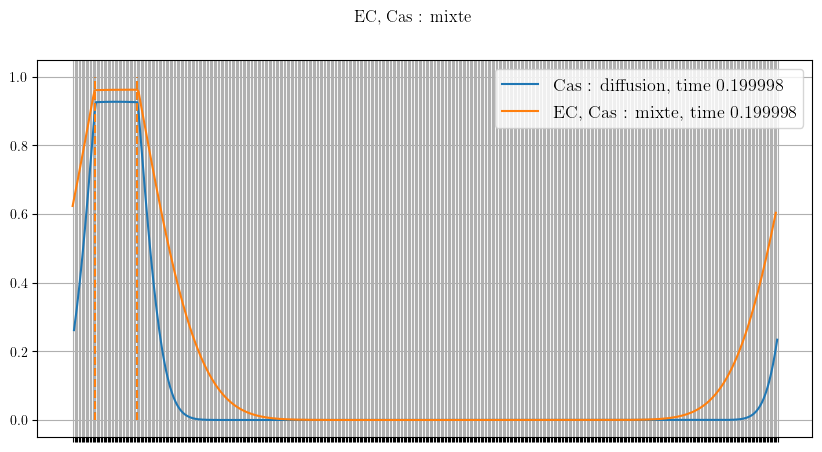

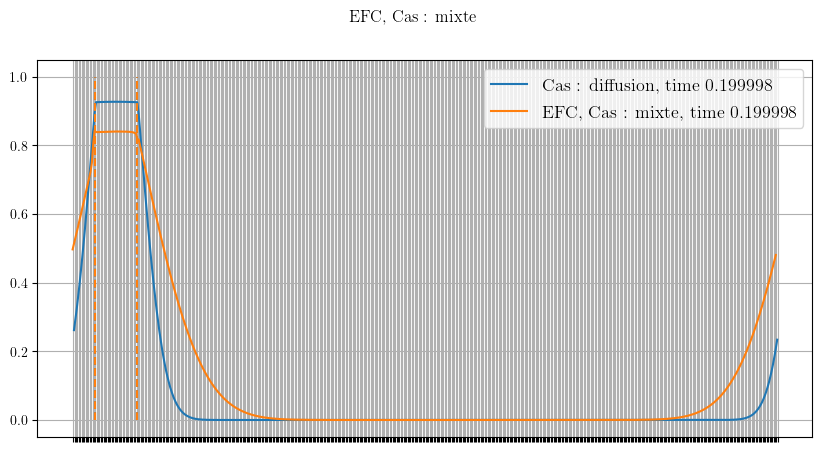

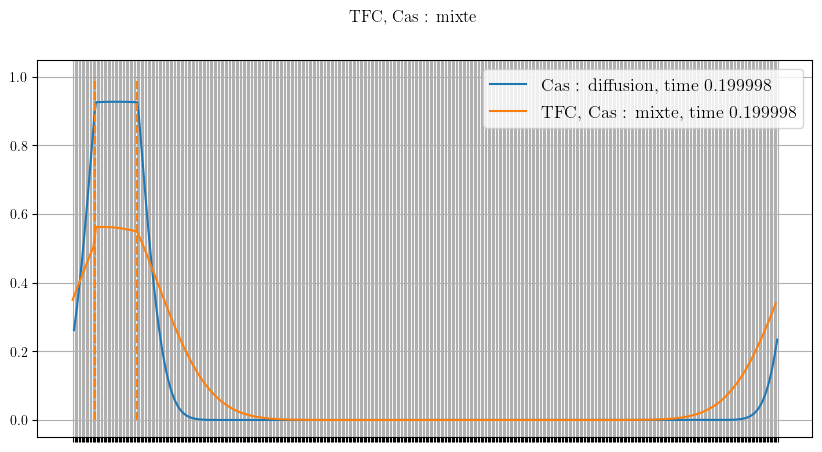

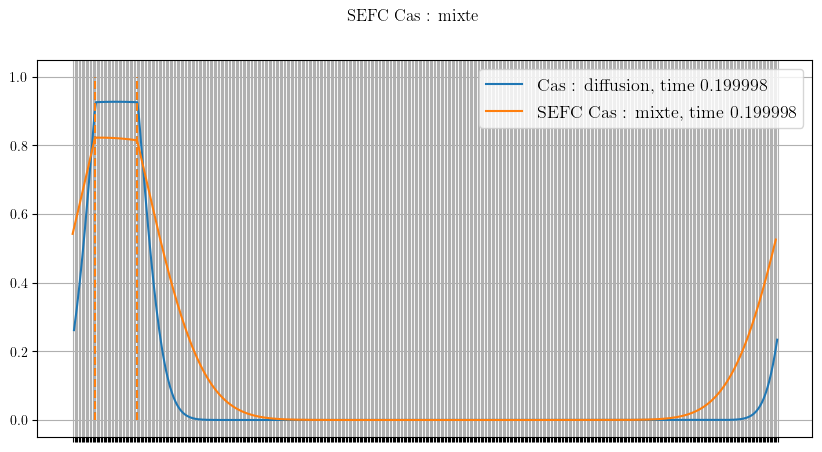

In [5]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale')
plot1 = Plotter('decale')
plot2 = Plotter('decale')
plot3 = Plotter('decale')
plot4 = Plotter('decale')
# plot5 = Plotter('decale')
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r'$t [s]$')
ax1.set_ylabel(r'$E_{tot} [J/m^3]$')

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2, plot3, plot4])
l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n/5)
dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)

prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
print(prob0.name)
print('==========================')
t, e = prob0.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0])
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0.name)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob1 = ProblemConserv2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob1.energy
print(prob1.name)
print('==========================')
t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob2 = ProblemDiscontinu(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob2.energy
print(prob2.name)
print('==========================')
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob3 = ProblemDiscontinu2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob3.energy
print(prob3.name)
print('==========================')
t, e = prob3.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot3])
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob3.name)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob3.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob4 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob4.energy
print(prob4.name)
print('==========================')
t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)


# prob5 = ProblemDiscontinuEnergieTemperature(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
# E0 = prob5.energy
# print(prob5.name)
# print('==========================')
# t, e = prob5.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5])
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5.name)

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)

# Modif plot énergie 

ax1.minorticks_on()
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor', alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

handles, labels = ax1.get_legend_handles_labels()
labels[0] = 'TC, ' + labels[0]
labels[1] = 'TC, ' + labels[1]
ax1.legend(handles, labels)
fig1.savefig(savefig_path + 'energie.png')

# Modif plot température

handles, labels = plot.ax.get_legend_handles_labels()
labels[0] = 'TC, ' + labels[0]
labels[1] = 'TC, ' + labels[1]
plot.ax.legend(handles, labels)
plot.ax.set_xlabel(r'$x [m]$')
plot.ax.set_ylabel(r'$T [K]$')
plot.fig.savefig(savefig_path + 'temperature.png')